# Лабораторная работа №4: Классификация. Деревья решений

## Выполнил студент группы 6133-010402D Читоркин Егор Евгеньевич

1. Считать в `pandas.DataFrame` любой источник данных: CSV, JSON, Excel-файл, HTML-таблицу и т.п.

In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('data.csv')

2. Датасет и подготовка данных:
   - Привести описание датасета.

|Название признака|Значение признака|Единица измерения|
|-----------------|-----------------|-----------------|
|Price|Цена|Рубли|
|Apartment type|Тип|Первичное/вторичное|
|Metro station|Ближайшая станция метро|-|
|Minutes to metro|Время до ближайшей станции|Минуты|
|Region|Область|-|
|Number of rooms|Количество комнат|-|
|Area|Площадь|кв. м|
|Living area|Жилая площадь|кв. м|
|Kitchen area|Площадь кухни|кв. м|
|Floor|Этаж|-|
|Number of floors|Количество этажей в доме|-|
|Renovation|Внутренная отделка|-|

   - Осуществить предобработку данных (избавиться от `null`, убрать некоторые признаки и т.п.) - "подчистить данные".
   - Закодировать категориальные признаки при необходимости.

Будем определять, первочное жилье (1) или вторичное (0)

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22676 entries, 0 to 22675
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Price             22676 non-null  float64
 1   Apartment type    22676 non-null  object 
 2   Metro station     22676 non-null  object 
 3   Minutes to metro  22676 non-null  float64
 4   Region            22676 non-null  object 
 5   Number of rooms   22676 non-null  float64
 6   Area              22676 non-null  float64
 7   Living area       22676 non-null  float64
 8   Kitchen area      22676 non-null  float64
 9   Floor             22676 non-null  float64
 10  Number of floors  22676 non-null  int64  
 11  Renovation        22676 non-null  object 
dtypes: float64(7), int64(1), object(4)
memory usage: 2.1+ MB


In [4]:
category = [var for var in data.columns if data[var].dtype == 'object']
category

['Apartment type', 'Metro station', 'Region', 'Renovation']

In [5]:
for col in category:
    print(f'{col}: {len(data[col].unique())} unique objects')

Apartment type: 2 unique objects
Metro station: 547 unique objects
Region: 2 unique objects
Renovation: 4 unique objects


In [6]:
cols = ['Region', 'Renovation']
data = pd.get_dummies(data=data, columns=cols, drop_first=False)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22676 entries, 0 to 22675
Data columns (total 16 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Price                                 22676 non-null  float64
 1   Apartment type                        22676 non-null  object 
 2   Metro station                         22676 non-null  object 
 3   Minutes to metro                      22676 non-null  float64
 4   Number of rooms                       22676 non-null  float64
 5   Area                                  22676 non-null  float64
 6   Living area                           22676 non-null  float64
 7   Kitchen area                          22676 non-null  float64
 8   Floor                                 22676 non-null  float64
 9   Number of floors                      22676 non-null  int64  
 10  Region_Moscow                         22676 non-null  bool   
 11  Region_Moscow r

In [7]:
keys, values = pd.factorize(data['Metro station'].unique())
d = dict(zip(values, keys))
data['Metro station'] = data['Metro station'].replace(d)
data['Apartment type'] = data['Apartment type'].replace({'Secondary': 0, 'New building': 1})

C:\Users\79372\AppData\Local\Temp\ipykernel_9460\1081806189.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['Metro station'] = data['Metro station'].replace(d)
C:\Users\79372\AppData\Local\Temp\ipykernel_9460\1081806189.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['Apartment type'] = data['Apartment type'].replace({'Secondary': 0, 'New building': 1})


In [8]:
data.head()

,Price,Apartment type,Metro station,Minutes to metro,Number of rooms,Area,Living area,Kitchen area,Floor,Number of floors,Region_Moscow,Region_Moscow region,Renovation_Cosmetic,Renovation_Designer,Renovation_European-style renovation,Renovation_Without renovation
0,6300000.0,0,0,6.0,1.0,30.6,11.1,8.5,25.0,25,False,True,True,False,False,False
1,9000000.0,0,1,2.0,1.0,49.2,20.0,10.0,6.0,15,False,True,False,False,True,False
2,11090000.0,0,2,14.0,1.0,44.7,16.2,13.1,10.0,25,False,True,True,False,False,False
3,8300000.0,0,3,8.0,1.0,35.1,16.0,11.0,12.0,33,False,True,False,False,True,False
4,6450000.0,0,0,6.0,1.0,37.7,15.2,4.0,5.0,5,False,True,False,False,False,True


   - Нормализовать данные.

In [9]:
from sklearn.preprocessing import StandardScaler

In [10]:
X = data.drop(['Apartment type'], axis=1)
y = data['Apartment type']

In [11]:
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)
X_scaled.head()

,Price,Metro station,Minutes to metro,Number of rooms,Area,Living area,Kitchen area,Floor,Number of floors,Region_Moscow,Region_Moscow region,Renovation_Cosmetic,Renovation_Designer,Renovation_European-style renovation,Renovation_Without renovation
0,-0.360057,-2.244691,-0.949114,-0.684669,-0.605069,-0.719189,-0.529779,2.094025,0.863466,-1.566885,1.566885,0.879332,-0.392272,-0.439142,-0.405198
1,-0.327458,-2.237701,-1.593826,-0.684669,-0.333009,-0.485737,-0.335677,-0.422588,-0.159125,-1.566885,1.566885,-1.137227,-0.392272,2.277167,-0.405198
2,-0.302224,-2.230711,0.340311,-0.684669,-0.398830,-0.585413,0.065466,0.107226,0.863466,-1.566885,1.566885,0.879332,-0.392272,-0.439142,-0.405198
3,-0.335910,-2.223721,-0.626758,-0.684669,-0.539248,-0.590659,-0.206276,0.372132,1.681539,-1.566885,1.566885,-1.137227,-0.392272,2.277167,-0.405198
4,-0.358246,-2.244691,-0.949114,-0.684669,-0.501218,-0.611644,-1.112084,-0.555041,-1.181716,-1.566885,1.566885,-1.137227,-0.392272,-0.439142,2.467931


   - Разбить выборку на обучающую и тестовую.
     > Далее используем обучающую выборку, в том числе для метрик.

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.3, random_state = 42)
print(y_train.shape, y_test.shape)

(15873,) (6803,)


3. Дерево решений:
   - С использованием `GridSearchCV` осуществить подбор гиперпараметра `DecisionTreeClassifier` (как минимум `max_depth`, `max_features`, другие параметры - по желанию.)

In [16]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

In [17]:
grid = {
    'max_depth': range(1, X.shape[1]),
    'max_features': range(2, 20),
    'min_samples_leaf': range(5, 20)
}

In [18]:
model = DecisionTreeClassifier()

search = GridSearchCV(model, grid, cv = 5)
search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': range(1, 15),
                         'max_features': range(2, 20),
                         'min_samples_leaf': range(5, 20)})

- Вывести значения гиперпараметра и метрик для наилучшей модели `DecisionTreeClassifier` ($accuracy$, $precision$, $recall$, $\textit{f-measure}$).

In [19]:
search.best_params_


Caching the list of root modules, please wait!
(This will only be done once - type '%rehashx' to reset cache!)



{'max_depth': 12, 'max_features': 13, 'min_samples_leaf': 5}

In [20]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [21]:
best_model = search.best_estimator_

In [22]:
print(f'Accuracy:\t{accuracy_score(y_train, best_model.predict(X_train))}')
print(f'Precision:\t{precision_score(y_train, best_model.predict(X_train))}')
print(f'Recall:\t{recall_score(y_train, best_model.predict(X_train))}')
print(f'F-measure:\t{f1_score(y_train, best_model.predict(X_train))}')

Accuracy:	0.9912429912429912
Precision:	0.9864884929472902
Recall:	0.9928272564255828
F-measure:	0.9896477247337454


   - Для полученного наилучшего дерева вывести `feature_importances`, отсортировать их по убыванию.

In [23]:
features = zip(X_train.columns, best_model.feature_importances_)
features = sorted(features, key=lambda x: x[1], reverse=True)
len_max = max([len(col) for col in X_train.columns])
for f_name, f_val in features:
    print(f"{f_name:<{len_max}} importance: {f_val:.5f}")

Renovation_Cosmetic                  importance: 0.50557
Metro station                        importance: 0.17776
Price                                importance: 0.12824
Area                                 importance: 0.06430
Kitchen area                         importance: 0.04592
Number of floors                     importance: 0.02463
Minutes to metro                     importance: 0.02221
Region_Moscow                        importance: 0.01247
Renovation_European-style renovation importance: 0.00708
Living area                          importance: 0.00502
Floor                                importance: 0.00375
Region_Moscow region                 importance: 0.00305
Number of rooms                      importance: 0.00000
Renovation_Designer                  importance: 0.00000
Renovation_Without renovation        importance: 0.00000


   - Осуществить фильтрацию признаков (по какому-нибудь значению порога важности признака).

In [24]:
import numpy as np

In [27]:
f_val_t = np.mean([v for _, v in features])
f_filtered = [f for f, v in features if v > f_val_t]
f_filtered

['Renovation_Cosmetic', 'Metro station', 'Price']

   - Подобрать лучшую модель с использованием `GridSearchCV` на обучающей выборке с отфильтрованными признаками.

In [29]:
X_train_filtered = X_train[f_filtered]
X_train_filtered.head()

,Renovation_Cosmetic,Metro station,Price
5763,-1.137227,-0.315461,-0.303914
11876,-1.137227,0.460425,-0.378772
17441,0.879332,0.110927,-0.359014
2657,-1.137227,-1.776363,2.703072
4957,0.879332,-0.154692,-0.292444


In [30]:
search_f = GridSearchCV(model, grid, cv = 5)
search_f.fit(X_train_filtered, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': range(1, 15),
                         'max_features': range(2, 20),
                         'min_samples_leaf': range(5, 20)})

   - Вывести полученные гиперпараметры лучшей модели.

In [31]:
search_f.best_params_

{'max_depth': 14, 'max_features': 4, 'min_samples_leaf': 5}

   - Сравнить метрики до и после фильтрации признаков лучших моделей.

In [32]:
best_model_f = search_f.best_estimator_

In [33]:
print('-----------BEFORE FILTER-----------')
print(f'Accuracy:\t{accuracy_score(y_train, best_model.predict(X_train))}')
print(f'Precision:\t{precision_score(y_train, best_model.predict(X_train))}')
print(f'Recall:\t{recall_score(y_train, best_model.predict(X_train))}')
print(f'F-measure:\t{f1_score(y_train, best_model.predict(X_train))}')
print('-----------AFTER FILTER-----------')
print(f'Accuracy:\t{accuracy_score(y_train, best_model_f.predict(X_train_filtered))}')
print(f'Precision:\t{precision_score(y_train, best_model_f.predict(X_train_filtered))}')
print(f'Recall:\t{recall_score(y_train, best_model_f.predict(X_train_filtered))}')
print(f'F-measure:\t{f1_score(y_train, best_model_f.predict(X_train_filtered))}')

-----------BEFORE FILTER-----------
Accuracy:	0.9912429912429912
Precision:	0.9864884929472902
Recall:	0.9928272564255828
F-measure:	0.9896477247337454
-----------AFTER FILTER-----------
Accuracy:	0.9896679896679896
Precision:	0.9861483467381591
Recall:	0.9893903167961745
F-measure:	0.9877666716395643


В среднем метрики немного ухудшились, но не критично

4. Случайный лес
   - Построить случайный лес (`RandomForestClassifier`), c использованием `GridSearchCV` осуществить подбор гиперпараметра.

In [34]:
from sklearn.ensemble import RandomForestClassifier

In [35]:
forest_model = RandomForestClassifier()

In [36]:
forest_grid = {
    'max_depth': range(1, X.shape[1]),
    'n_estimators': range(10, 151, 10)
}

In [37]:
forest_search = GridSearchCV(forest_model, forest_grid, cv = 5)
forest_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': range(1, 15),
                         'n_estimators': range(10, 151, 10)})

   - Вывести полученные гиперпараметры лучшей модели случайного леса.

In [38]:
forest_search.best_params_

{'max_depth': 14, 'n_estimators': 120}

   - Осуществить фильтрацию признаков.

In [39]:
forest_best_model = forest_search.best_estimator_

In [40]:
forest_features = zip(X_train.columns, forest_best_model.feature_importances_)
forest_features = sorted(forest_features, key=lambda x: x[1], reverse=True)
forest_len_max = max([len(col) for col in X_train.columns])
for f_name, f_val in forest_features:
    print(f"{f_name:<{forest_len_max}} importance: {f_val:.5f}")

Renovation_Cosmetic                  importance: 0.19298
Metro station                        importance: 0.16393
Price                                importance: 0.14471
Number of floors                     importance: 0.10203
Region_Moscow                        importance: 0.09010
Region_Moscow region                 importance: 0.08810
Area                                 importance: 0.04819
Kitchen area                         importance: 0.04169
Minutes to metro                     importance: 0.03674
Living area                          importance: 0.02978
Renovation_European-style renovation importance: 0.01636
Number of rooms                      importance: 0.01279
Floor                                importance: 0.01252
Renovation_Designer                  importance: 0.01097
Renovation_Without renovation        importance: 0.00913


In [41]:
forest_f_val_t = np.mean([v for _, v in forest_features])
forest_f_filtered = [f for f, v in forest_features if v > forest_f_val_t]
forest_f_filtered

['Renovation_Cosmetic',
 'Metro station',
 'Price',
 'Number of floors',
 'Region_Moscow',
 'Region_Moscow region']

   - Подобрать лучшую модель с использованием `GridSearchCV` на обучающей выборке с отфильтрованными признаками.

In [42]:
X_train_forest_filtered = X_train[forest_f_filtered]
X_train_forest_filtered.head()

,Renovation_Cosmetic,Metro station,Price,Number of floors,Region_Moscow,Region_Moscow region
5763,-1.137227,-0.315461,-0.303914,0.045393,0.638209,-0.638209
11876,-1.137227,0.460425,-0.378772,-0.772679,0.638209,-0.638209
17441,0.879332,0.110927,-0.359014,0.352171,-1.566885,1.566885
2657,-1.137227,-1.776363,2.703072,-0.159125,0.638209,-0.638209
4957,0.879332,-0.154692,-0.292444,0.045393,0.638209,-0.638209


In [45]:
forest_search_f = GridSearchCV(forest_model, forest_grid, cv = 5)
forest_search_f.fit(X_train_forest_filtered, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': range(1, 15),
                         'n_estimators': range(10, 151, 10)})

   - Вывести полученные гиперпараметры лучшей модели случайного леса.

In [46]:
forest_search_f.best_params_

{'max_depth': 14, 'n_estimators': 150}

   - Сравнить метрики до и после фильтрации признаков лучших моделей.

In [47]:
forest_best_model_f = forest_search_f.best_estimator_

In [48]:
print('-----------BEFORE FILTER-----------')
print(f'Accuracy:\t{accuracy_score(y_train, forest_best_model.predict(X_train))}')
print(f'Precision:\t{precision_score(y_train, forest_best_model.predict(X_train))}')
print(f'Recall:\t{recall_score(y_train, forest_best_model.predict(X_train))}')
print(f'F-measure:\t{f1_score(y_train, forest_best_model.predict(X_train))}')
print('-----------AFTER FILTER-----------')
print(f'Accuracy:\t{accuracy_score(y_train, forest_best_model_f.predict(X_train_forest_filtered))}')
print(f'Precision:\t{precision_score(y_train, forest_best_model_f.predict(X_train_forest_filtered))}')
print(f'Recall:\t{recall_score(y_train, forest_best_model_f.predict(X_train_forest_filtered))}')
print(f'F-measure:\t{f1_score(y_train, forest_best_model_f.predict(X_train_forest_filtered))}')

-----------BEFORE FILTER-----------
Accuracy:	0.9998109998109999
Precision:	0.9998505455088925
Recall:	0.9997011356843993
F-measure:	0.9997758350145707
-----------AFTER FILTER-----------
Accuracy:	0.9996219996219996
Precision:	0.9997010463378176
Recall:	0.9994022713687986
F-measure:	0.9995516365266777


Можно считать, что метрики не изменились (ухудшение в 4 знаке слабо похоже на ухудшение)

5. Метод ближайших соседей:
   - С использованием `GridSearchCV` осуществить подбор гиперпараметра `KNeighborsClassifier` (`n_neighbors`).

In [49]:
from sklearn.neighbors import KNeighborsClassifier

In [55]:
knn_model = KNeighborsClassifier()

In [56]:
knn_grid = {
    'n_neighbors': range(2, 21),
}

In [57]:
knn_search = GridSearchCV(knn_model, knn_grid, cv = 5)
knn_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': range(2, 21)})

   - Вывести значения гиперпараметра и метрик для наилучшей модели.

In [58]:
knn_search.best_params_

{'n_neighbors': 2}

   - Осуществить фильтрацию признаков.

Для KNN feature_importances_ не определены, поэтому возьмем фильтрацию от DecisionTree Classifier

In [62]:
knn_filtered = f_filtered
X_train_knn_filtered = X_train[knn_filtered]
X_train_knn_filtered.head()

,Renovation_Cosmetic,Metro station,Price
5763,-1.137227,-0.315461,-0.303914
11876,-1.137227,0.460425,-0.378772
17441,0.879332,0.110927,-0.359014
2657,-1.137227,-1.776363,2.703072
4957,0.879332,-0.154692,-0.292444


   - Подобрать лучшую модель с использованием `GridSearchCV` на обучающей выборке с отфильтрованными признаками.

In [63]:
knn_search_f = GridSearchCV(knn_model, knn_grid, cv = 5)
knn_search_f.fit(X_train_knn_filtered, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': range(2, 21)})

   - Вывести полученные гиперпараметры лучшей модели случайного леса.

In [64]:
knn_search_f.best_params_

{'n_neighbors': 2}

   - Сравнить метрики до и после фильтрации признаков.

In [65]:
knn_best_model = knn_search.best_estimator_
knn_best_model_f = knn_search_f.best_estimator_

In [66]:
print('-----------BEFORE FILTER-----------')
print(f'Accuracy:\t{accuracy_score(y_train, knn_best_model.predict(X_train))}')
print(f'Precision:\t{precision_score(y_train, knn_best_model.predict(X_train))}')
print(f'Recall:\t{recall_score(y_train, knn_best_model.predict(X_train))}')
print(f'F-measure:\t{f1_score(y_train, knn_best_model.predict(X_train))}')
print('-----------AFTER FILTER-----------')
print(f'Accuracy:\t{accuracy_score(y_train, knn_best_model_f.predict(X_train_knn_filtered))}')
print(f'Precision:\t{precision_score(y_train, knn_best_model_f.predict(X_train_knn_filtered))}')
print(f'Recall:\t{recall_score(y_train, knn_best_model_f.predict(X_train_knn_filtered))}')
print(f'F-measure:\t{f1_score(y_train, knn_best_model_f.predict(X_train_knn_filtered))}')

-----------BEFORE FILTER-----------
Accuracy:	0.9952119952119952
Precision:	1.0
Recall:	0.9886431560071728
F-measure:	0.9942891493838293
-----------AFTER FILTER-----------
Accuracy:	0.9938889938889939
Precision:	1.0
Recall:	0.9855050806933652
F-measure:	0.9926996312184843


6. Если наблюдается улучшение метрик после фильтрации признаков хотя бы для одной из моделей, то для набора отфильтрованных признаков (пересечение множеств отфильтрованных признаков каждой модели или объединение множеств &ndash; не особо важно, главное описать, каким образом получен новый subset данных) заново построить наилучшие модели `KNeighborsClassifier`, `DecisionTreeClassifier`, `RandomForestClassifier`, сравнить модели в пункте 7 на одинаковом полученном наборе отфильтрованных признаков. Иначе &ndash; пропустить этот пункт.

После фильтрации метрики не улучшились - пропускаем

7. Оценка качества построенных моделей:
   - Визуализировать любое полученное дерево решений.
     > Для вывода названий признаков в граф необходимо задать значение аргумента `feature_names` в `sklearn.tree.export_graphviz`, для вывода названий классов &ndash; `class_names` (перед кодированием целевого признака можно сохранить названия в отдельный массив).

In [67]:
from sklearn.tree import plot_tree

[Text(0.29468813387423937, 0.9666666666666667, 'Renovation_Cosmetic <= -0.129\ngini = 0.488\nsamples = 15873\nvalue = [9181, 6692]\nclass = Secondary'),
 Text(0.1301343813387424, 0.9, 'Metro station <= 1.561\ngini = 0.053\nsamples = 6910\nvalue = [6721, 189]\nclass = Secondary'),
 Text(0.12607758620689655, 0.8333333333333334, 'Price <= -0.112\ngini = 0.051\nsamples = 6903\nvalue = [6721, 182]\nclass = Secondary'),
 Text(0.04323022312373225, 0.7666666666666667, 'Price <= -0.225\ngini = 0.101\nsamples = 3353\nvalue = [3175, 178]\nclass = Secondary'),
 Text(0.008113590263691683, 0.7, 'Price <= -0.225\ngini = 0.002\nsamples = 2141\nvalue = [2139, 2]\nclass = Secondary'),
 Text(0.004056795131845842, 0.6333333333333333, 'gini = 0.0\nsamples = 2109\nvalue = [2109, 0]\nclass = Secondary'),
 Text(0.012170385395537525, 0.6333333333333333, 'Metro station <= -0.148\ngini = 0.117\nsamples = 32\nvalue = [30, 2]\nclass = Secondary'),
 Text(0.008113590263691683, 0.5666666666666667, 'gini = 0.375\nsamp

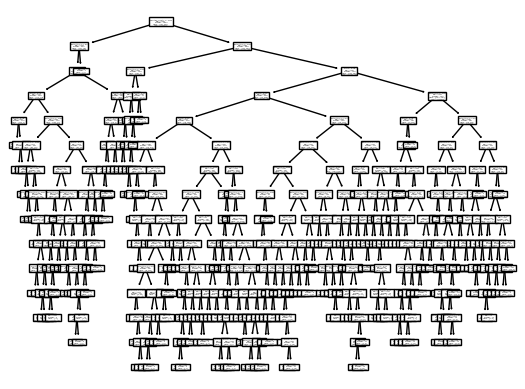

In [70]:
plot_tree(decision_tree=best_model_f, feature_names=X_train_filtered.columns, class_names=['Secondary','New building'])

In [75]:
from sklearn.tree import export_graphviz

export_graphviz(
    best_model,
    feature_names=X_train.columns,
    class_names=['Secondary','New building'],
    out_file = 'small_tree.dot',
    filled = True
)

In [76]:
!dot -Tpng ./small_tree.dot -o ./small_tree.png

![title](small_tree.png)

   - Сравнить лучшие модели `KNeighborsClassifier`, `DecisionTreeClassifier`, `RandomForestClassifier` на **тестовой выборке**. Привести значения метрик $accuracy$, $precision$, $recall$, $\textit{f-measure}$.

In [80]:
print('-----------DECISION TREE-----------')
print(f'Accuracy:\t{accuracy_score(y_test, best_model.predict(X_test))}')
print(f'Precision:\t{precision_score(y_test, best_model.predict(X_test))}')
print(f'Recall:\t{recall_score(y_test, best_model.predict(X_test))}')
print(f'F-measure:\t{f1_score(y_test, best_model.predict(X_test))}')
print('-----------RANDOM FOREST-----------')
print(f'Accuracy:\t{accuracy_score(y_test, forest_best_model.predict(X_test))}')
print(f'Precision:\t{precision_score(y_test, forest_best_model.predict(X_test))}')
print(f'Recall:\t{recall_score(y_test, forest_best_model.predict(X_test))}')
print(f'F-measure:\t{f1_score(y_test, forest_best_model.predict(X_test))}')
print('-----------KNN-----------')
print(f'Accuracy:\t{accuracy_score(y_test, knn_best_model.predict(X_test))}')
print(f'Precision:\t{precision_score(y_test, knn_best_model.predict(X_test))}')
print(f'Recall:\t{recall_score(y_test, knn_best_model.predict(X_test))}')
print(f'F-measure:\t{f1_score(y_test, knn_best_model.predict(X_test))}')

-----------DECISION TREE-----------
Accuracy:	0.9872115243275026
Precision:	0.9800629590766002
Recall:	0.989406779661017
F-measure:	0.9847127042698999
-----------RANDOM FOREST-----------
Accuracy:	0.9961781566955755
Precision:	0.9985785358919688
Recall:	0.992231638418079
F-measure:	0.9953949698901877
-----------KNN-----------
Accuracy:	0.9858885785682787
Precision:	0.9861407249466951
Recall:	0.9798728813559322
F-measure:	0.9829968119022316


Случайный лес показывает метрики, близкие к 1. Остальные классификаторы - на 0.01 меньше, что тоже очень хорошо :)